Con el método del codo y el método de la silueta sacamos el numero de clusters óptimo

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

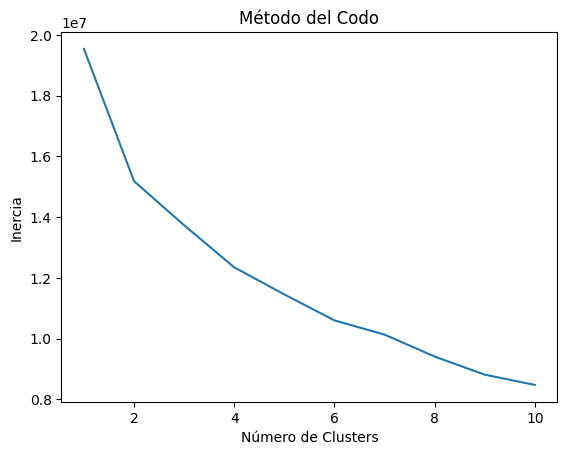

In [9]:
# Leer archivo limpio
df = pd.read_csv("archivo_limpio.csv")

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Realizar clustering con diferentes valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia versus K
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

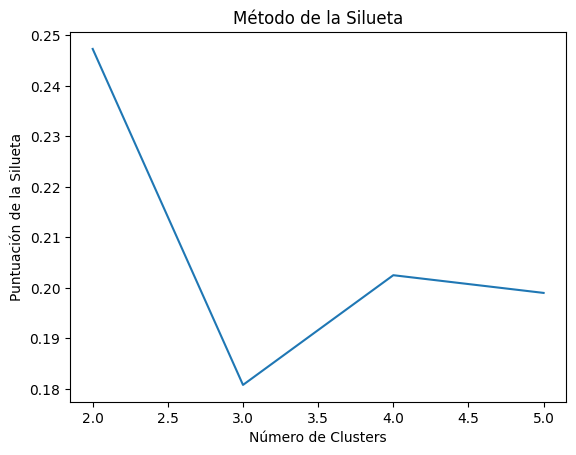

El número óptimo de clusters es: 2


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Leer archivo limpio
df = pd.read_csv("archivo_limpio.csv")

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Realizar clustering con diferentes valores de K
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Encontrar el valor óptimo de K
optimal_k = np.argmax(silhouette_scores) + 2

# Graficar la puntuación de la silueta versus K
plt.plot(range(2, 6), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de la Silueta')
plt.title('Método de la Silueta')
plt.show()

print("El número óptimo de clusters es:", optimal_k)



C:\Users\kenic\AppData\Local\Temp\ipykernel_24124\1291793986.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_nueve["promedio"] = (data_no_nueve["NUPHON"] + data_no_nueve["NUPMUJ"]) / 2
c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


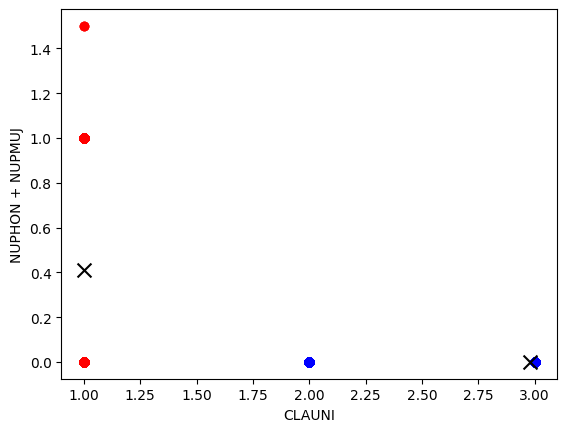

In [6]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar los datos desde el archivo CSV
data = pd.read_csv("archivo_limpio.csv")

# Seleccionar las filas que no tienen valor nueve en la columna "CLAUNI"
data_no_nueve = data[data["CLAUNI"] != 9]

# Crear la nueva columna con los datos promediados de NUPHON y NUPMUJ
data_no_nueve["promedio"] = (data_no_nueve["NUPHON"] + data_no_nueve["NUPMUJ"]) / 2

# Seleccionar una muestra aleatoria de 1000 filas de las columnas "CLAUNI" y "promedio"
sample = data_no_nueve[["CLAUNI", "promedio"]].sample(n=10000)

# Convertir la muestra en un array de NumPy
X = sample.values

# Crear un modelo de clustering con K-Means
kmeans = KMeans(n_clusters=2)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de cluster para cada punto de datos
labels = kmeans.predict(X)

# Obtener las coordenadas de los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Graficar los puntos de datos y los centroides de cada cluster
colors = ["r", "b"]
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[labels[i]])
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="k", s=100)

# Agregar etiquetas de ejes
plt.xlabel("CLAUNI")
plt.ylabel("NUPHON + NUPMUJ")

plt.show()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('archivo_limpio.csv')

X = df[['CLAUNI', 'NUPHON', 'NUPMUJ']]

# Aplicar k-means
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


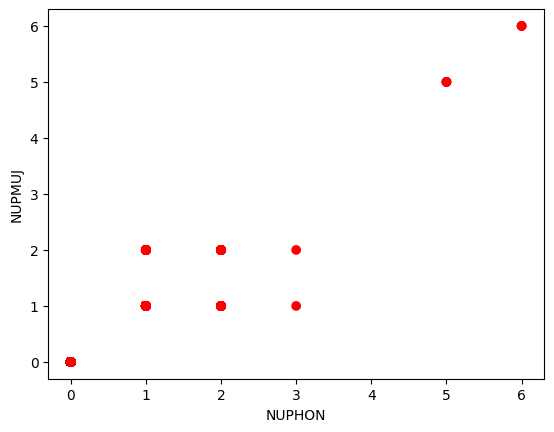

In [17]:
# Graficar los resultados
colors = np.array(['red', 'blue'])
plt.scatter(X['NUPHON'], X['NUPMUJ'], c=colors[y_kmeans])
plt.xlabel('NUPHON')
plt.ylabel('NUPMUJ')
plt.show()




           DEPREG    MUPREG    MESREG    AÑOREG    CLAUNI   EDADHOM   EDADMUJ  \
DEPREG   1.000000  0.999948  0.008328 -0.041457  0.118861  0.015716  0.009233   
MUPREG   0.999948  1.000000  0.008366 -0.041899  0.119584  0.015684  0.009198   
MESREG   0.008328  0.008366  1.000000  0.009482 -0.001220  0.002602  0.003098   
AÑOREG  -0.041457 -0.041899  0.009482  1.000000  0.279948 -0.124359 -0.145461   
CLAUNI   0.118861  0.119584 -0.001220  0.279948  1.000000 -0.040829 -0.046095   
EDADHOM  0.015716  0.015684  0.002602 -0.124359 -0.040829  1.000000  0.436270   
EDADMUJ  0.009233  0.009198  0.003098 -0.145461 -0.046095  0.436270  1.000000   
GETHOM  -0.067941 -0.068397 -0.006675 -0.141830  0.005191  0.068974  0.052704   
GETMUJ  -0.061897 -0.062331 -0.004404 -0.134990  0.012143  0.047841  0.068508   
NACHOM  -0.019089 -0.019211 -0.001908  0.019624 -0.007546  0.010497  0.001573   
NACMUJ  -0.020463 -0.020562 -0.001606  0.021196 -0.006007 -0.004153  0.005954   
OCUHOM  -0.001061 -0.000791 

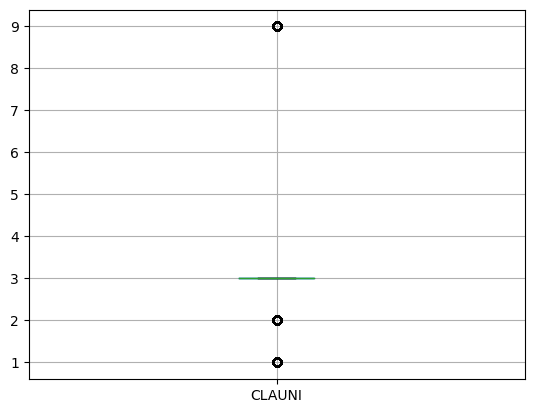

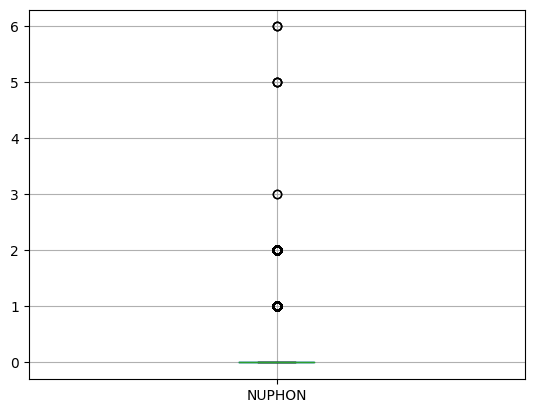

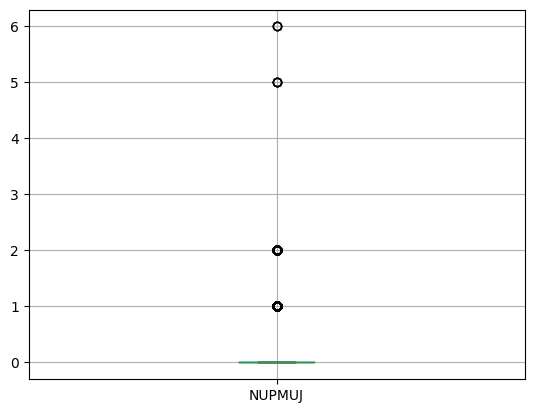

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo CSV
data = pd.read_csv("archivo_limpio.csv")

# Análisis de correlaciones
correlations = data.corr()
print(correlations)

# Seleccionar las columnas 'CLAUNI', 'NUPHON' y 'NUPMUJ'
selected_columns = ['CLAUNI', 'NUPHON', 'NUPMUJ']
data = data[selected_columns]

# Diagramas de caja para detectar outliers
for column in data.columns:
    data.boxplot(column=column)
    plt.show()

